In [ ]:
!pip install --upgrade numpy
!pip install --upgrade pandas

     |████████████████████████████████| 15.3MB 283kB/s 
ERROR: tensorflow 2.5.0 has requirement numpy~=1.19.2, but you'll have numpy 1.20.3 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5


     |████████████████████████████████| 9.9MB 12.7MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.2.4 which is incompatible.
  Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5


In [ ]:
!pip install --upgrade pythainlp


     |████████████████████████████████| 11.0MB 10.1MB/s 
     |████████████████████████████████| 747kB 58.6MB/s 


In [ ]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7MB 14.8MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-cp37-none-any.whl size=136870 sha256=3e1a22e91f1711c931a6c9076d4a3c3c9d02dae01b36315c11cd7578134f1f0c
  Stored in directory: /root/.cache/pip/wheels/a0/9c/fc/c6e00689d35c82cf96a8adc70edfe7ba7904374fdac3240ac2
Successfully built pyLDAvis


In [ ]:
import pandas as pd
import pythainlp
import gensim
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_least_angle.py:169: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not 

In [ ]:
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!ls '/content/drive/MyDrive/Colab Notebooks/CRM'


 CustomerReviews.csv
 Retail_Data_Response.csv
 Retail_Data_Transactions.csv
'WK10 - python hyperparameter campaign response.ipynb'
'WK13 - Voice of customer analytics.ipynb'
'Wongnai Reviews - Small.csv'


In [ ]:
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/Colab Notebooks/CRM/'  #change dir to your project folder

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CRM/CustomerReviews.csv')

OSError: ignored

In [ ]:
df.tail()

,Review ID,Restaurant_ID,Restaurant,User,Headline,Review,Rating
16,17,436045MJ-ข้าน้อยขอชาบู,ข้าน้อยขอชาบู,ployynp,บุฟเฟ่ต์ชาบูและพิซซ่าไม่อั้นในราคา 199 บาท เน้...,หลังจากที่เคยลองสาขายูเนี่ยนมอลล์ไป รอบนี้มาที...,4.0
17,18,436045MJ-ข้าน้อยขอชาบู,ข้าน้อยขอชาบู,27a91236fe5e4559a4f097c97a480781,ร้านบุฟเฟ่ต์ ราคามิตรภาพ อยู่ชั้น4 ติดโรงหนัง ...,ร้านบุฟเฟ่ต์ที่มีโปรโมชั่นหัวละ199บาท ไม่รวมน้...,4.0
18,19,436045MJ-ข้าน้อยขอชาบู,ข้าน้อยขอชาบู,0b81d251e4db486f9bcdba73b374ed99,ของหลากหลาย ปนๆ งงๆ นิดหน่อย,เคยรู้จักร้านนี้จากที่ union mall ไม่เคยได้ลอง...,3.0
19,20,436045MJ-ข้าน้อยขอชาบู,ข้าน้อยขอชาบู,40e0e087f3914fd49a8933b5a29936ca,อร่อยมากค่ะ คุ้มค่าสมราคา บุฟเฟ่หมูผักต่างๆ รว...,อร่อยมากค่ะ คุ้มค่าสมราคา บุฟเฟ่หมูผักต่างๆ รว...,5.0
20,21,436045MJ-ข้าน้อยขอชาบู,ข้าน้อยขอชาบู,41841cb99ea243a3a8d4b006e946c586,แม้จะแปลกบ้าง แต่ก็ถือว่าอยู่ในเกณฑ์ที่ดี มีอา...,ก็ตามที่เขียนเลยครับ ว่า ถ้าจะจ่ายในราคา 199 บ...,NaN


In [ ]:
stopwords = list(pythainlp.corpus.thai_stopwords())
#removed_words = [' ', '  ', '\n', 'ร้าน', '(', ')' , '           ','-',':',' ','1', '2','3','4', '560', 'กัน', 'กับ', 'การ', 'กิน', 'ก็', 'ก่อน', 'ของ','/','+','โม','บุ','ฟเฟ่','บุฟเฟ่']
removed_words = [' ', '  ', '\n', 'ร้าน', '(', ')' , '           ','-',':',' ','1', '2','3','4', '560', 'กัน', 'กับ', 'การ', 'กิน', 'ก็', 'ก่อน', 'ของ','/','+','โม','บุ','ฟเฟ่','บุฟเฟ่','ชาบู','ทาน','น้ำ']
screening_words = stopwords + removed_words


In [ ]:
def tokenize_with_space(sentence):
  merged = ''
  words = pythainlp.word_tokenize(str(sentence), engine='newmm')
  for word in words:
    if word not in screening_words:
      merged = merged + ',' + word
  return merged[1:]

In [ ]:
df['Review_tokenized'] = df['Review'].apply(lambda x: tokenize_with_space(x))

In [ ]:
df.tail()

,Review ID,Restaurant_ID,Restaurant,User,Headline,Review,Rating,Review_tokenized,topics,score
16,17,436045MJ-ข้าน้อยขอชาบู,ข้าน้อยขอชาบู,ployynp,บุฟเฟ่ต์ชาบูและพิซซ่าไม่อั้นในราคา 199 บาท เน้...,หลังจากที่เคยลองสาขายูเนี่ยนมอลล์ไป รอบนี้มาที...,4.0,"หลังจากที่,ลอง,สาขา,ยู,นม,อลล์,รอบ,สาขา,เดอะ,ม...",3,0.994562
17,18,436045MJ-ข้าน้อยขอชาบู,ข้าน้อยขอชาบู,27a91236fe5e4559a4f097c97a480781,ร้านบุฟเฟ่ต์ ราคามิตรภาพ อยู่ชั้น4 ติดโรงหนัง ...,ร้านบุฟเฟ่ต์ที่มีโปรโมชั่นหัวละ199บาท ไม่รวมน้...,4.0,"บุฟเฟ่ต์,โปรโมชั่น,หัว,199,บาท,VAT,ธรรมดา,ชอบ,...",3,0.993499
18,19,436045MJ-ข้าน้อยขอชาบู,ข้าน้อยขอชาบู,0b81d251e4db486f9bcdba73b374ed99,ของหลากหลาย ปนๆ งงๆ นิดหน่อย,เคยรู้จักร้านนี้จากที่ union mall ไม่เคยได้ลอง...,3.0,"รู้จัก,union,mall,ลอง,จำได้,ขึ้นใจ,ชื่อ,😆,ชื่อ...",13,0.991070
19,20,436045MJ-ข้าน้อยขอชาบู,ข้าน้อยขอชาบู,40e0e087f3914fd49a8933b5a29936ca,อร่อยมากค่ะ คุ้มค่าสมราคา บุฟเฟ่หมูผักต่างๆ รว...,อร่อยมากค่ะ คุ้มค่าสมราคา บุฟเฟ่หมูผักต่างๆ รว...,5.0,"อร่อย,คุ้มค่า,สมราคา,หมู,ผัก,จบ,255,ท่าน,เด็ด,...",10,0.991269
20,21,436045MJ-ข้าน้อยขอชาบู,ข้าน้อยขอชาบู,41841cb99ea243a3a8d4b006e946c586,แม้จะแปลกบ้าง แต่ก็ถือว่าอยู่ในเกณฑ์ที่ดี มีอา...,ก็ตามที่เขียนเลยครับ ว่า ถ้าจะจ่ายในราคา 199 บ...,NaN,"จ่าย,ราคา,199,บาท,จ่าย,เงินสด,ราคา,VAT,7,%,สั่...",4,0.987554


**Data dict.**

In [ ]:
documents = df['Review_tokenized'].to_list()
texts = [[text for text in doc.split(',')] for doc in documents]
dictionary = gensim.corpora.Dictionary(texts)

In [ ]:
print(dictionary.token2id.keys())

dict_keys(['ข้างนอก', 'ความต้องการ', 'คอ', 'คุณภาพ', 'คุ้ม', 'จำกัด', 'ซุป', 'ดำ', 'ดี', 'ดีมาก', 'ถาด', 'ถาม', 'น่ารัก', 'น้ำจิ้ม', 'บริการ', 'บาท', 'ประทับใจ', 'พนักงาน', 'พอกับ', 'ภาพ', 'รสชาติ', 'ราคา', 'สรุป', 'สะอาดสะอ้าน', 'สัน', 'หลากหลาย', 'อร่อย', 'อันนี้', 'อาหาร', 'เคลม', 'เซ็ท', 'เต้าเจี้ยว', 'เนื้อ', 'เป็ด', 'เผ็ด', 'แบบนี้', 'แปลก', 'แฟน', 'โดยรวม', 'โมจิ', 'ใส่ใจ', 'ไม่ต้อง', 'ไอติม', '\u200b', '21', '30', '9', 'CTW', 'Terminal', 'กา', 'การงด', 'คิดถึง', 'ญี่ปุ่น', 'ฐาน', 'ทะยอย', 'ทำงาน', 'ที่ทาง', 'นาที', 'นึกถึง', 'พนักงานบริการ', 'พระราม', 'พรีเมียม', 'พาราไดซ์', 'มาตรา', 'มีโอ', 'รายละเอียด', 'ลูกค้า', 'สมาทาน', 'สาขา', 'สู้', 'ออร์เดอร์', 'เครื่องดื่ม', 'เค้า', 'เจอ', 'เป็นกันเอง', 'เหวี่ยง', 'แจ้ง', 'โม่', 'โอเค', '', '++', '555', '600', '::', 'กก', 'กรุบ', 'กั้น', 'ของหวาน', 'คนละ', 'คาว', 'คุ', 'คุ้มค่า', 'จาน', 'จิ้ม', 'จืด', 'ฉาก', 'ชอบ', 'ชาเขียว', 'ชิ้น', 'ซอย', 'ซอส', 'ตก', 'ตะ', 'ตัก', 'ตามน้ำ', 'ต่างกัน', 'ถั่ว', 'ถ่ายรูป', 'นั่ง', 'นุ่ม', 'บด', 'บาร์', 

In [ ]:
gensim_corpus = [dictionary.doc2bow(text, allow_update=True) for text in texts]

In [ ]:
print(word_frequencies)

[[('ข้างนอก', 1), ('ความต้องการ', 1), ('คอ', 1), ('คุณภาพ', 1), ('คุ้ม', 1), ('จำกัด', 1), ('ซุป', 1), ('ดำ', 1), ('ดี', 2), ('ดีมาก', 1), ('ถาด', 1), ('ถาม', 1), ('น่ารัก', 1), ('น้ำ', 1), ('น้ำจิ้ม', 1), ('บริการ', 3), ('บาท', 1), ('ประทับใจ', 2), ('พนักงาน', 1), ('พอกับ', 1), ('ภาพ', 1), ('รสชาติ', 3), ('ราคา', 1), ('สรุป', 1), ('สะอาดสะอ้าน', 1), ('สัน', 1), ('หลากหลาย', 1), ('อร่อย', 3), ('อันนี้', 1), ('อาหาร', 3), ('เคลม', 1), ('เซ็ท', 1), ('เต้าเจี้ยว', 1), ('เนื้อ', 2), ('เป็ด', 1), ('เผ็ด', 1), ('แบบนี้', 1), ('แปลก', 1), ('แฟน', 1), ('โดยรวม', 1), ('โมจิ', 1), ('ใส่ใจ', 1), ('ไม่ต้อง', 1), ('ไอติม', 1), ('\u200b', 12)], [('คุณภาพ', 1), ('ดี', 2), ('น่ารัก', 1), ('บริการ', 2), ('พนักงาน', 1), ('อาหาร', 1), ('21', 1), ('30', 1), ('9', 1), ('CTW', 1), ('Terminal', 1), ('กา', 1), ('การงด', 1), ('คิดถึง', 1), ('ชาบู', 1), ('ญี่ปุ่น', 1), ('ฐาน', 1), ('ทะยอย', 1), ('ทำงาน', 1), ('ที่ทาง', 1), ('นาที', 1), ('นึกถึง', 1), ('พนักงานบริการ', 1), ('พระราม', 1), ('พรีเมียม', 1), ('พาราไ

In [ ]:
word_frequencies = [[(dictionary[id], frequence) for id, frequence in couple] for couple in gensim_corpus]

In [ ]:
num_topics = 20
chunksize = 1000 # size of the doc looked at every pass
passes = 20 # number of passes through documents
iterations = 50
eval_every = 1  # Don't evaluate model perplexity, takes too much time.

temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

%time model = gensim.models.LdaModel(corpus=gensim_corpus, id2word=id2word, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

CPU times: user 387 ms, sys: 879 µs, total: 388 ms
Wall time: 389 ms


In [ ]:
#pyLDAvis.gensim_models.prepare(model, gensim_corpus, dictionary)
#TypeError: Object of type complex is not JSON serializable
#fix by these link https://stackoverflow.com/questions/46379763/typeerror-object-of-type-complex-is-not-json-serializable-while-using-pyldavi

pyLDAvis.gensim_models.prepare(model, gensim_corpus, dictionary, mds='mmds') 

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.149824  0.146089       1        1  18.308492
5      0.015936 -0.205569       2        1  16.561537
4     -0.144824 -0.101059       3        1   8.212191
13    -0.141273  0.137841       4        1   7.223226
16     0.143870 -0.086849       5        1   7.118698
6      0.072354 -0.100348       6        1   5.840721
11     0.037597  0.153815       7        1   5.813078
12    -0.055550 -0.123988       8        1   4.804448
9     -0.133416  0.008157       9        1   4.159361
14     0.089108  0.060368      10        1   3.999494
18     0.129526  0.008202      11        1   3.840160
17    -0.052831  0.113775      12        1   3.600232
1     -0.078175 -0.018408      13        1   2.800560
8     -0.041560  0.041013      14        1   2.720887
7     -0.004404 -0.056821      15        1   2.639527
0      0.005958  0.037776      16        1   2.244790
10     0.001956 -0.003499      17        1   0.029832
19     0.001968 -0.003497      18        1   0.027664
15     0.001967 -0.003506      19        1   0.027597
3      0.001968 -0.003496      20        1   0.027505, topic_info=         Term       Freq      Total Category  logprob  loglift
8          ดี  19.000000  19.000000  Default  30.0000  30.0000
26      อร่อย  19.000000  19.000000  Default  29.0000  29.0000
21       ราคา  17.000000  17.000000  Default  28.0000  28.0000
32      เนื้อ  17.000000  17.000000  Default  27.0000  27.0000
141     เลือก  16.000000  16.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
212  บุฟเฟ่ต์   0.001418   6.316089  Topic20  -5.4910  -0.2032
96        ชอบ   0.001439   7.085097  Topic20  -5.4762  -0.3032
109      นุ่ม   0.001397   7.008232  Topic20  -5.5059  -0.3220
208        คน   0.001511   9.709145  Topic20  -5.4272  -0.5694
124        สด   0.001434   9.309736  Topic20  -5.4797  -0.5799

[1083 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
79        1  0.672319         
79       14  0.268928         
232       7  0.967953     !!!!
321       2  0.567214        "
321      11  0.283607        "
...     ...       ...      ...
171       3  0.318226  ไอศกรีม
171       7  0.318226  ไอศกรีม
255       7  0.967953  ไอศครีม
43        1  0.983231        ​
231       9  0.983720        –

[705 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 6, 5, 14, 17, 7, 12, 13, 10, 15, 19, 18, 2, 9, 8, 1, 11, 20, 16, 4])

In [ ]:
model.show_topic(2)

NameError: ignored

In [ ]:
df['topics'] = df['Review_tokenized'].apply(lambda x: model.get_document_topics(dictionary.doc2bow(x.split(',')))[0][0])
df['score'] = df['Review_tokenized'].apply(lambda x: model.get_document_topics(dictionary.doc2bow(x.split(',')))[0][1])

In [ ]:
df.tail()

,Review ID,Restaurant_ID,Restaurant,User,Headline,Review,Rating,Review_tokenized,topics,score
16,17,436045MJ-ข้าน้อยขอชาบู,ข้าน้อยขอชาบู,ployynp,บุฟเฟ่ต์ชาบูและพิซซ่าไม่อั้นในราคา 199 บาท เน้...,หลังจากที่เคยลองสาขายูเนี่ยนมอลล์ไป รอบนี้มาที...,4.0,"หลังจากที่,ลอง,สาขา,ยู,นม,อลล์,รอบ,สาขา,เดอะ,ม...",3,0.994562
17,18,436045MJ-ข้าน้อยขอชาบู,ข้าน้อยขอชาบู,27a91236fe5e4559a4f097c97a480781,ร้านบุฟเฟ่ต์ ราคามิตรภาพ อยู่ชั้น4 ติดโรงหนัง ...,ร้านบุฟเฟ่ต์ที่มีโปรโมชั่นหัวละ199บาท ไม่รวมน้...,4.0,"บุฟเฟ่ต์,โปรโมชั่น,หัว,199,บาท,น้ำ,VAT,ทาน,ธรร...",3,0.993499
18,19,436045MJ-ข้าน้อยขอชาบู,ข้าน้อยขอชาบู,0b81d251e4db486f9bcdba73b374ed99,ของหลากหลาย ปนๆ งงๆ นิดหน่อย,เคยรู้จักร้านนี้จากที่ union mall ไม่เคยได้ลอง...,3.0,"รู้จัก,union,mall,ลอง,จำได้,ขึ้นใจ,ชื่อ,😆,ชื่อ...",13,0.991070
19,20,436045MJ-ข้าน้อยขอชาบู,ข้าน้อยขอชาบู,40e0e087f3914fd49a8933b5a29936ca,อร่อยมากค่ะ คุ้มค่าสมราคา บุฟเฟ่หมูผักต่างๆ รว...,อร่อยมากค่ะ คุ้มค่าสมราคา บุฟเฟ่หมูผักต่างๆ รว...,5.0,"อร่อย,คุ้มค่า,สมราคา,หมู,ผัก,น้ำ,จบ,255,ท่าน,เ...",10,0.991269
20,21,436045MJ-ข้าน้อยขอชาบู,ข้าน้อยขอชาบู,41841cb99ea243a3a8d4b006e946c586,แม้จะแปลกบ้าง แต่ก็ถือว่าอยู่ในเกณฑ์ที่ดี มีอา...,ก็ตามที่เขียนเลยครับ ว่า ถ้าจะจ่ายในราคา 199 บ...,NaN,"จ่าย,ราคา,199,บาท,จ่าย,เงินสด,ราคา,น้ำ,VAT,7,%...",4,0.987554


In [ ]:
df[['Restaurant', 'Review', 'topics']]

,Restaurant,Review,topics
0,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,ที่สำคัญของร้านนี้คือบริการดีมากพนักงานน่ารักส...,2
1,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,นึกถึงชาบูญี่ปุ่นยังไงก็ต้อง คิดถึงโมโม่ พาราไ...,17
2,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,มาทานช่วงนี้ สามารถนั่งโต๊ะเดียวกัน หม้อเดียวก...,2
3,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,ถ้านึกถึงชาบูที่มีเนื้อเน้นๆ ในราคาไม่โหดจนเกิ...,11
4,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,เดินมาหน้าร้านแล้วได้กลิ่นชาบูหอมมาก ๆ ประกอบ...,1
5,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,ร้านบุฟเฟ่ ชาบูแนวญี่ปุ่น สายเนื้อหมู เนื้อวัว...,0
6,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,Number 20 : โมโม – พาราไดส์ (สาขาเดอะมอลบางกะป...,9
7,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,ร้านชาบูเฟรนไชส์รสชาติดีมากคุ้มค่าเหมาะสมกับรา...,11
8,Shabushi (ชาบูชิ) เดอะมอลล์บางกะปิ ชั้น G,มา านที่ขาบูชิต้องมาตอนหิว ไม่งั้นจะไม่คุ้มนะค...,2
9,Shabushi (ชาบูชิ) เดอะมอลล์บางกะปิ ชั้น G,ใครชอบกุ้งทอดเทมปุระ แค่กุ้งเทมปุระก็คุ้มแล้ว ...,13


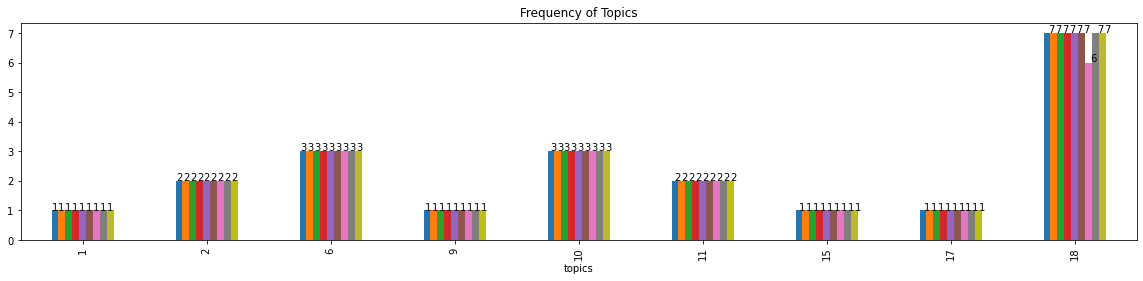

In [ ]:
#https://github.com/gaurikatyagi/Natural-Language-Processing/blob/master/Introdution%20to%20NLP-Clustering%20Text.ipynb
# fig = plt.figure(figsize=(10,4))
%matplotlib inline  
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,4)

topic_frequency = df.iloc[:, :].groupby('topics').count()
ax = topic_frequency.plot.bar( legend=False)
plt.title("Frequency of Topics", size=12)
# plt.xticks(rotation=45)
ax.tick_params(axis='x', which='minor', labelsize='small', labelcolor='m', rotation=30)


for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

In [ ]:
pyLDAvis.display(vis_data)

NameError: ignored

In [ ]:
df.iloc[:, :6]

,Review ID,Restaurant_ID,Restaurant,User,Headline,Review
0,1,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,7b16469831074f7abc7824745ee75212,ที่สำคัญของร้านนี้คือบริการดีมากพนักงานน่ารักส...,ที่สำคัญของร้านนี้คือบริการดีมากพนักงานน่ารักส...
1,2,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,pakkaramonpondej,รสชาติเหมือนทุกสาขา แต่สาขานี้ บริการดี ที่นั่งดี,นึกถึงชาบูญี่ปุ่นยังไงก็ต้อง คิดถึงโมโม่ พาราไ...
2,3,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,saanowy,ชาบูพรีเมี่ยมสไตล์ญี่ปุ่น เนื้อดีมากกก,มาทานช่วงนี้ สามารถนั่งโต๊ะเดียวกัน หม้อเดียวก...
3,4,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,ployynp,เนื้อดี ไอติมดี คุ้มค่าดี,ถ้านึกถึงชาบูที่มีเนื้อเน้นๆ ในราคาไม่โหดจนเกิ...
4,5,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,665a902b335b434ab489f00f2fbb477e,อาหารมีคุณภาพ บริการดีค่ะ,เดินมาหน้าร้านแล้วได้กลิ่นชาบูหอมมาก ๆ ประกอบ...
5,6,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,12f2b56b28bb4849a92690cedc1cc50a,กินให้อิ่ม ที่ momo,ร้านบุฟเฟ่ ชาบูแนวญี่ปุ่น สายเนื้อหมู เนื้อวัว...
6,7,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,f2628bf47a394345b133fec76a79661d,ชาบู - สุกกี้สไลต์ญี่ปุ่นที่แท้ทรู,Number 20 : โมโม – พาราไดส์ (สาขาเดอะมอลบางกะป...
7,8,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,backscrash,ร้านชาบูเฟรนไชส์ ที่ราคาเหมาะสมกับคุณภาพ ถือว่...,ร้านชาบูเฟรนไชส์รสชาติดีมากคุ้มค่าเหมาะสมกับรา...
8,9,4621tm-shabushi-เดอะมอลล์บางกะปิ-ชั้น-g,Shabushi (ชาบูชิ) เดอะมอลล์บางกะปิ ชั้น G,a477a5812ada4d5b80fd04fca22bdbca,อร่อยคุ้ม ของทานเล่นเยอะมาก,มา านที่ขาบูชิต้องมาตอนหิว ไม่งั้นจะไม่คุ้มนะค...
9,10,4621tm-shabushi-เดอะมอลล์บางกะปิ-ชั้น-g,Shabushi (ชาบูชิ) เดอะมอลล์บางกะปิ ชั้น G,fd2ba94ec1bc4948ae109e2cb6c9cbc6,ทานอีก ชอบกุ้งทอดเทมปุระ,ใครชอบกุ้งทอดเทมปุระ แค่กุ้งเทมปุระก็คุ้มแล้ว ...
